# Exploratory Data Analysis

Explanatory variables:
* Chlorophyll
* Secchi depth
* Total cell count
* Total biovolume
* Cyanobacterial cell count
* Cyanobacterial biovolume

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns #use sns.__version__ to see version should be 0.11.1
import matplotlib.pyplot as plt
import datetime as dt

# turn off top and rigt axis line in matplotlib
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

# change font size in matplolib
plt.rcParams.update({'font.size': 14})

# increasing the deafult DPI to improve resolution
#plt.rcParams['figure.dpi']= 50 # for preview
plt.rc("savefig", dpi = 300) # for saving

# Routine water quality data

In [2]:
# Import Kateri's processed water quality data
df = pd.read_csv("../../data/raw/ul_data_wqp_processed_2020-03-05.csv")

In [3]:
# Selecting relevant columns
df = df.loc[:,["MonitoringLocationIdentifier","datetime",
               "CharacteristicName", 
               "ResultMeasureValue"]].copy()

In [68]:
# Transform table
wq = df.pivot_table("ResultMeasureValue", ['MonitoringLocationIdentifier','datetime'],'CharacteristicName') 
wq.columns.name = ''

In [69]:
# Make datetime column datetime type
wq = wq.reset_index()
wq.datetime = pd.to_datetime(wq['datetime'])

In [70]:
# Take average to get daily values
# used this to groupby https://pbpython.com/pandas-grouper-agg.html 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
wq = wq.groupby(['MonitoringLocationIdentifier',
                 pd.Grouper(key='datetime', freq='D')])[wq.columns[2:]].mean()
wq = wq.reset_index()
wq.datetime = pd.to_datetime(wq['datetime'])

In [71]:
wq.head()

,MonitoringLocationIdentifier,datetime,"Alkalinity, total",Aluminum,Ammonia-nitrogen,Arsenic,Barium,Bicarbonate,"Biochemical oxygen demand, standard conditions",Boron,...,Total Kjeldahl nitrogen,Total dissolved solids,Total fixed solids,Total suspended solids,Total volatile solids,Turbidity,Volatile suspended solids,Weather condition (WMO code 4501) (choice list),Zinc,pH
0,NALMS-7458,2012-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,NALMS-7458,2015-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,8.0
2,USGS-401327111462601,2016-08-10,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1037.386667,NaN,NaN,NaN,110.0,NaN,NaN,NaN,NaN
3,USGS-401432111454301,2016-08-10,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1034.040000,NaN,NaN,NaN,74.0,NaN,NaN,NaN,NaN
4,USGS-401613111463301,2016-08-10,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,980.683333,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN


In [72]:
wq.shape

(1243, 77)

In [73]:
wq.datetime.describe()

count                    1243
unique                    214
top       2018-05-16 00:00:00
freq                       20
first     1978-08-31 00:00:00
last      2019-09-23 00:00:00
Name: datetime, dtype: object

Two reasons to collapse spatial variability
* Social media data does not have spatial information
* Water quality parameters do not have a consistent temporal or spatial pattern of measuremnts

In [10]:
# Collapse spatial variability by dropping location and averaging (or taking maximum) of daily values
# First see how many unique observations
wq.datetime.describe()

count                    1243
unique                    214
top       2018-05-16 00:00:00
freq                       20
first     1978-08-31 00:00:00
last      2019-09-23 00:00:00
Name: datetime, dtype: object

In [11]:
# Select rows from 2016
wq_16 = wq.loc[wq['datetime'] > '2015-12-31']
wq_16.datetime.describe()

In [12]:
# Drop locations column
wq_16 = wq_16.iloc[:,1:]

In [13]:
wq_16.head()

,datetime,"Alkalinity, total",Aluminum,Ammonia-nitrogen,Arsenic,Barium,Bicarbonate,"Biochemical oxygen demand, standard conditions",Boron,Bromide,...,Total Kjeldahl nitrogen,Total dissolved solids,Total fixed solids,Total suspended solids,Total volatile solids,Turbidity,Volatile suspended solids,Weather condition (WMO code 4501) (choice list),Zinc,pH
2,2016-08-10,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.398,...,NaN,1037.386667,NaN,NaN,NaN,110.0,NaN,NaN,NaN,NaN
3,2016-08-10,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.395,...,NaN,1034.040000,NaN,NaN,NaN,74.0,NaN,NaN,NaN,NaN
4,2016-08-10,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.379,...,NaN,980.683333,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN
5,2016-08-10,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.395,...,NaN,1050.723333,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN
13,2016-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Take daily average
wq_16 = wq_16.groupby([
                 pd.Grouper(key='datetime', freq='D')])[wq.columns[1:]].mean()

In [15]:
wq_16 = wq_16.reset_index()
wq_16.describe()

,"Alkalinity, total",Aluminum,Ammonia-nitrogen,Arsenic,Barium,Bicarbonate,"Biochemical oxygen demand, standard conditions",Boron,Bromide,Cadmium,...,Total Kjeldahl nitrogen,Total dissolved solids,Total fixed solids,Total suspended solids,Total volatile solids,Turbidity,Volatile suspended solids,Weather condition (WMO code 4501) (choice list),Zinc,pH
count,41.000000,14.000000,53.000000,27.000000,26.000000,3.000000,0.0,35.000000,1.00000,4.000000,...,20.000000,64.000000,0.0,63.000000,39.000000,38.000000,24.000000,0.0,11.000000,42.000000
mean,196.534002,450.118152,0.137085,9.505821,86.302973,225.177778,NaN,321.041172,0.39175,0.081125,...,2.418558,1136.164226,NaN,69.300348,12.542847,56.815465,25.958808,NaN,9.288606,8.507930
std,23.029922,292.484772,0.206261,3.832338,13.355922,11.426350,NaN,96.127825,NaN,0.036456,...,2.672706,275.475429,NaN,46.341656,10.444600,30.049953,14.828525,NaN,3.007211,0.183380
min,159.000000,7.275000,0.010000,2.280000,60.550000,212.000000,NaN,109.000000,0.39175,0.058500,...,0.310167,386.000000,NaN,7.000000,3.120000,6.400000,11.023699,NaN,5.040000,8.210972
25%,179.500000,331.246429,0.024500,7.472250,79.409091,221.600000,NaN,277.150000,0.39175,0.058875,...,1.006500,1027.290720,NaN,35.391250,6.460167,34.516667,15.418086,NaN,6.344000,8.385891
50%,193.181818,410.403409,0.041500,9.239091,85.658766,231.200000,NaN,337.375000,0.39175,0.065500,...,1.478292,1203.392857,NaN,60.866667,8.270625,56.325000,17.804320,NaN,9.980000,8.478534
75%,204.000000,682.583333,0.184875,11.543636,91.529545,231.766667,NaN,378.450000,0.39175,0.087750,...,1.812906,1289.308141,NaN,93.216667,14.159091,68.544097,34.145894,NaN,11.350000,8.604687
max,257.000000,904.250000,0.998667,17.650000,131.496667,232.333333,NaN,475.000000,0.39175,0.135000,...,10.776667,1770.000000,NaN,237.000000,52.000000,160.000000,71.462264,NaN,13.900000,8.992857


In [16]:
# Select variables of interest
pred = wq_16.loc[:,["datetime","Depth, Secchi disk depth", "Turbidity",
                    "Total suspended solids",
                    "Chlorophyll a, uncorrected for pheophytin", 
                     "Chlorophyll a, corrected for pheophytin",
                    "Chlorophyll a, free of pheophytin"]].copy()

In [17]:
pred.describe()

,"Depth, Secchi disk depth",Turbidity,Total suspended solids,"Chlorophyll a, uncorrected for pheophytin","Chlorophyll a, corrected for pheophytin","Chlorophyll a, free of pheophytin"
count,38.000000,38.000000,63.000000,38.000000,37.000000,24.000000
mean,0.257420,56.815465,69.300348,53.504597,44.056903,48.576293
std,0.119122,30.049953,46.341656,68.247422,51.627379,49.538559
min,0.100000,6.400000,7.000000,2.508000,2.799000,4.916500
25%,0.200000,34.516667,35.391250,14.703056,13.240000,12.569444
50%,0.239722,56.325000,60.866667,27.694250,23.650000,33.340833
75%,0.293591,68.544097,93.216667,50.513571,48.400000,64.615107
max,0.710000,160.000000,237.000000,294.900000,222.300000,181.000000


## Secchi Depth

In [18]:
# Select date and depth columns
d = pred.iloc[:,[0,1]]

In [19]:
# Drop null values
d = d.dropna(axis=0)

In [20]:
# Check number of rows
d.shape

(38, 2)

In [21]:
#plt.hist(depth.iloc[:,1], bins=30);

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


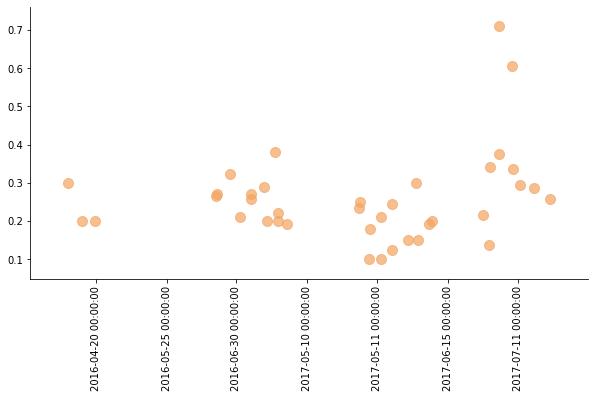

In [22]:
# Time series
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(d.iloc[:,0], d.iloc[:,1], color='sandybrown', alpha='0.7', s=100 )
ax.set_xticklabels(d.iloc[:,0], rotation = 90);
# see for improving ticks https://unidata.github.io/python-training/workshop/Time_Series/basic-time-series-plotting/

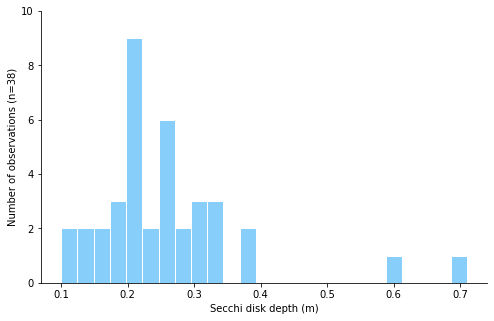

In [23]:
# Plot histogram to see distribution
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(d.iloc[:,1], bins=25, color='lightskyblue', linewidth=1, edgecolor="white")
ax.set(xlabel='Secchi disk depth (m)', ylabel=f'Number of observations (n={len(d)})')
ax.set_ylim([0,10]);

In [24]:
# Plot histogram of distribution
# ax = sns.distplot(d.iloc[:,1], bins=25, hist_kws=dict(edgecolor="white", linewidth=1))
# ax.set(xlabel='Secchi disk depth (m)', ylabel='Number of observations');

## Turbidity

In [25]:
# Select date and depth columns
t = pred.iloc[:,[0,2]]

In [26]:
# Drop null values
t = t.dropna(axis=0)

In [27]:
t.head()

,datetime,Turbidity
0,2016-01-07,6.400000
216,2016-08-10,85.750000
489,2017-05-10,57.016667
490,2017-05-11,39.460000
525,2017-06-15,34.081818


In [28]:
# Check number of rows
t.shape

(38, 2)

In [29]:
#plt.hist(depth.iloc[:,1], bins=30);
# Nephelometric Turbidity Ratio Unit

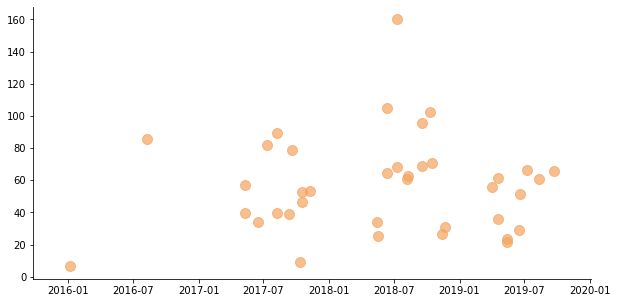

In [30]:
# Time series
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(t.iloc[:,0], t.iloc[:,1], color='sandybrown', alpha='0.7', s=100 );

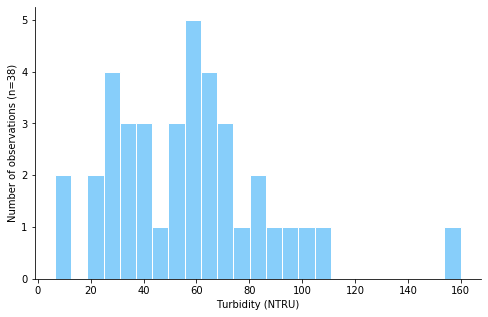

In [31]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(t.iloc[:,1], bins=25, color='lightskyblue', linewidth=1, edgecolor="white")
ax.set(xlabel='Turbidity (NTRU)', ylabel=f'Number of observations (n={len(t)})');

# Total suspended solids

In [32]:
# Select date and depth columns
tss = pred.iloc[:,[0,3]]

In [33]:
# Drop null values
tss = tss.dropna(axis=0)

In [34]:
tss.head()

,datetime,Total suspended solids
0,2016-01-07,7.000000
28,2016-02-04,10.000000
34,2016-02-10,7.917638
62,2016-03-09,90.380658
63,2016-03-10,108.641065


In [35]:
# Check number of rows
tss.shape

(63, 2)

In [36]:
#plt.hist(depth.iloc[:,1], bins=30);

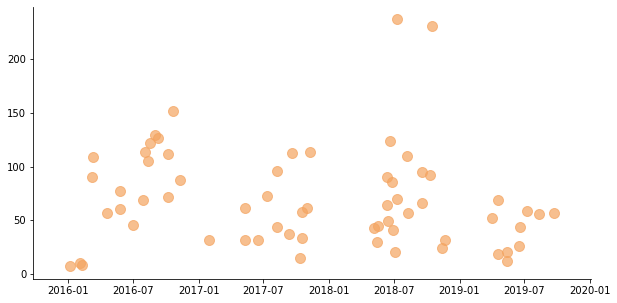

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(tss.iloc[:,0], tss.iloc[:,1], color='sandybrown', alpha='0.7', s=100 );

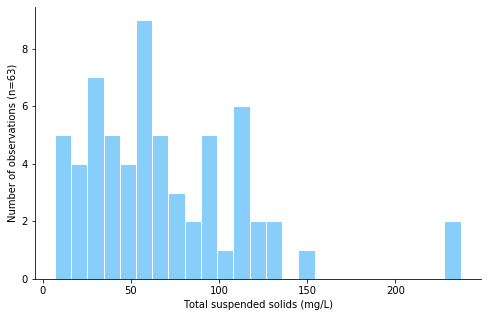

In [38]:
# Plot histogram of distribution
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(tss.iloc[:,1], bins=25, color='lightskyblue', linewidth=1, edgecolor="white")
ax.set(xlabel='Total suspended solids (mg/L)', ylabel=f'Number of observations (n={len(tss)})');

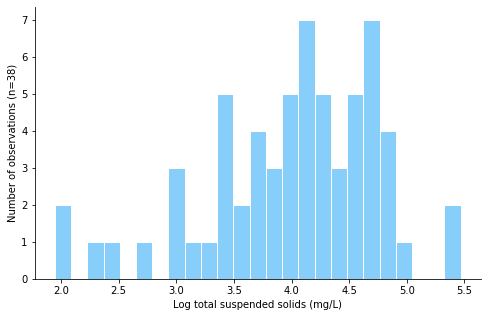

In [39]:
# Plot logged histogram of distribution
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(np.log(tss.iloc[:,1]), bins=25, color='lightskyblue', linewidth=1, edgecolor="white")
ax.set(xlabel='Log total suspended solids (mg/L)', ylabel=f'Number of observations (n={len(d)})');

## Chlorophyll a

c1: uncorrected for pheophytin

c2: corrected for pheophytin

c3: free of pheophytin

In [40]:
# Select date and depth columns
c1 = pred.iloc[:,[0,4]]
c2 = pred.iloc[:,[0,5]]
c3 = pred.iloc[:,[0,6]]

In [41]:
# Drop null values
c1 = c1.dropna(axis=0)
c2 = c2.dropna(axis=0)
c3 = c3.dropna(axis=0)

In [42]:
display(c1.head())
display(c2.head())
display(c3.head())

,datetime,"Chlorophyll a, uncorrected for pheophytin"
139,2016-05-25,16.760000
175,2016-06-30,25.870000
489,2017-05-10,28.751833
490,2017-05-11,5.833333
525,2017-06-15,19.370963


,datetime,"Chlorophyll a, corrected for pheophytin"
139,2016-05-25,22.280000
175,2016-06-30,22.480000
489,2017-05-10,22.644333
490,2017-05-11,4.600000
525,2017-06-15,19.315571


,datetime,"Chlorophyll a, free of pheophytin"
525,2017-06-15,13.438630
551,2017-07-11,80.520741
578,2017-08-07,61.419667
579,2017-08-08,6.925067
613,2017-09-11,29.641000


In [43]:
# Check number of rows
display(c1.shape)
display(c2.shape)
display(c3.shape)

(38, 2)

(37, 2)

(24, 2)

In [44]:
#plt.hist(depth.iloc[:,1], bins=30);

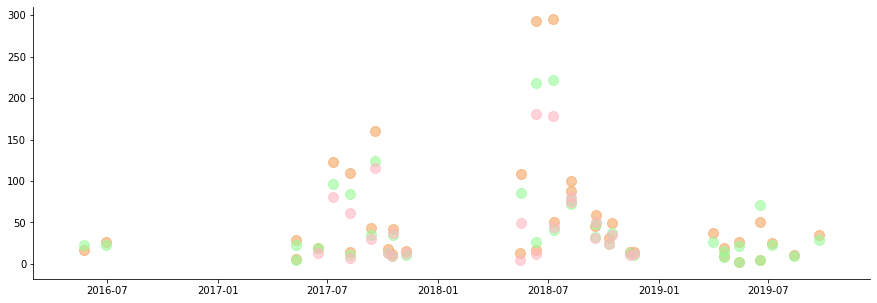

In [45]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(c1.iloc[:,0], c1.iloc[:,1], color='sandybrown', alpha='0.6', s=100 )
ax.scatter(c2.iloc[:,0], c2.iloc[:,1], color='palegreen', alpha='0.6', s=100 )
ax.scatter(c3.iloc[:,0], c3.iloc[:,1], color='lightpink', alpha='0.6', s=100 );

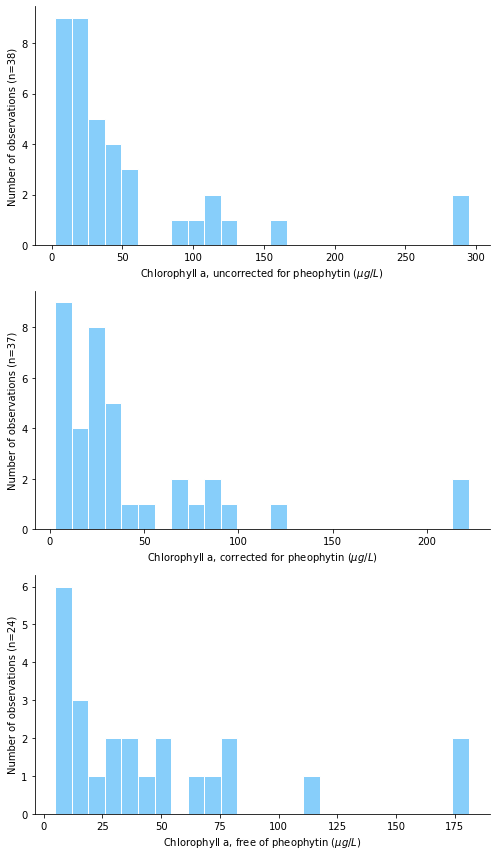

In [46]:
# Plot histogram of distribution
fig = plt.figure(figsize=(7,12))

ax1 = fig.add_subplot(3,1,1)
ax1.hist(c1.iloc[:,1], bins=25, color='lightskyblue', linewidth=1, edgecolor="white")
ax1.set(xlabel='Chlorophyll a, uncorrected for pheophytin ($ \mu g / L$)', ylabel=f'Number of observations (n={len(c1)})');

ax2 = fig.add_subplot(3,1,2)
ax2.hist(c2.iloc[:,1], bins=25, color='lightskyblue', linewidth=1, edgecolor="white")
ax2.set(xlabel='Chlorophyll a, corrected for pheophytin ($ \mu g / L$)', ylabel=f'Number of observations (n={len(c2)})');

ax3 = fig.add_subplot(3,1,3)
ax3.hist(c3.iloc[:,1], bins=25, color='lightskyblue', linewidth=1, edgecolor="white")
ax3.set(xlabel='Chlorophyll a, free of pheophytin ($ \mu g / L$)', ylabel=f'Number of observations (n={len(c3)})')

plt.tight_layout();

# Advisory data

df1: Total taxanomy

df2: Cyano taxanomy

In [128]:
# Import Kateri's advisory program data for cyanotoxins
df1 = pd.read_csv("../../data/raw/ULAdvisoryProgram_TotalTaxa_Toxins.csv")
df2 = pd.read_csv("../../data/raw/ULAdvisoryProgram_CyanoTaxa_Toxins.csv")

In [129]:
# Selecting relevant columns
df1 = df1.loc[:,["Depth","Date_Sampled",
                "Year", "Month",
                "Cells_per_mL", "IFCB_Biovolume_um3_per_mL"]].copy()

df2 = df2.loc[:,["Depth","Date_Sampled",
                "Year", "Month",
                "Cells_per_mL", "IFCB_Biovolume_um3_per_mL"]].copy()

In [130]:
# rename columns
df1 = df1.rename(columns={'Date_Sampled':'date',
                          'Cells_per_mL':'cell_count',
                          'IFCB_Biovolume_um3_per_mL':'biovolume',
                          'Microcystin.avg':'microcystin_avg',
                          'Anatoxin.avg':'anatoxin_Avg'
                         }, inplace=False)
df1.columns = df1.columns.str.lower()

df2 = df2.rename(columns={'Date_Sampled':'date',
                          'Cells_per_mL':'cell_count',
                          'IFCB_Biovolume_um3_per_mL':'biovolume',
                          'Microcystin.avg':'microcystin_avg',
                          'Anatoxin.avg':'anatoxin_Avg'
                         }, inplace=False)
df2.columns = df2.columns.str.lower()

In [131]:
# Change date column to datetime object
df1.date = pd.to_datetime(df1['date'])
df2.date = pd.to_datetime(df2['date'])

In [132]:
df1.head()

,depth,date,year,month,cell_count,biovolume
0,Composite,2016-07-26,2016,7,7.162994e+03,NaN
1,Composite,2016-08-02,2016,8,2.956425e+02,NaN
2,Composite,2016-08-23,2016,8,1.140335e+06,NaN
3,Composite,2016-07-20,2016,7,0.000000e+00,NaN
4,Composite,2016-07-26,2016,7,0.000000e+00,NaN


In [133]:
display(df1.shape)
display(df2.shape)

(364, 6)

(445, 6)

In [134]:
display(df1.date.nunique())
display(df2.date.nunique())

78

98

In [136]:
# Take average to get daily values
# used this to groupby https://pbpython.com/pandas-grouper-agg.html 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
df1 = df1.groupby([pd.Grouper(key='date', freq='D')])[df1.columns[4:]].mean()
df1 = df1.reset_index()
df1.datetime = pd.to_datetime(df1['date'])

df2 = df2.groupby([pd.Grouper(key='date', freq='D')])[df2.columns[4:]].mean()
df2 = df2.reset_index()
df2.datetime = pd.to_datetime(df2['date'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


In [137]:
df1.shape

(1154, 3)

In [138]:
df1.head()

,date,cell_count,biovolume
0,2016-07-13,2.373906e+07,NaN
1,2016-07-14,2.698017e+05,NaN
2,2016-07-15,4.604392e+06,NaN
3,2016-07-16,NaN,NaN
4,2016-07-17,NaN,NaN


# Cell count (total)

In [139]:
# Select date and depth columns
cct = df1.iloc[:,[0,1]]

In [140]:
# Drop null values
cct = cct.dropna(axis=0)

In [141]:
cct.head()

,date,cell_count
0,2016-07-13,2.373906e+07
1,2016-07-14,2.698017e+05
2,2016-07-15,4.604392e+06
7,2016-07-20,1.589423e+06
13,2016-07-26,2.865135e+04


In [142]:
# Check number of rows
cct.shape

(78, 2)

In [143]:
#plt.hist(depth.iloc[:,1], bins=30);

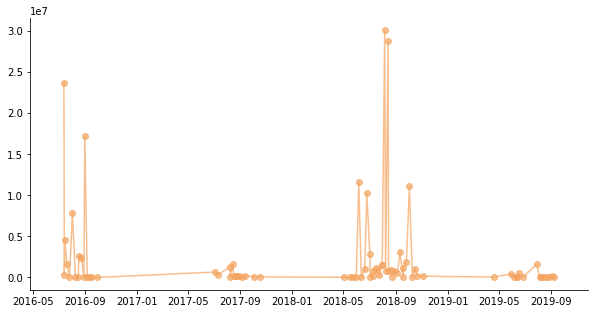

In [144]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(cct.iloc[:,0], cct.iloc[:,1], color='sandybrown', alpha=0.7)
ax.plot(cct.iloc[:,0], cct.iloc[:,1], color='sandybrown', alpha=0.7);

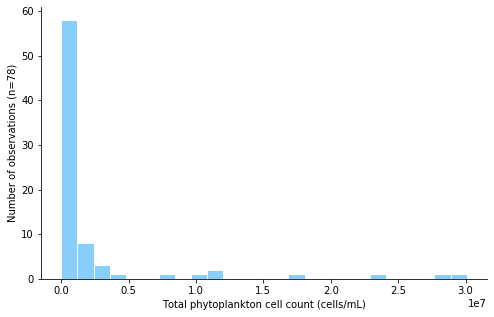

In [145]:
# Plot histogram of distribution
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(cct.iloc[:,1], bins=25, color='lightskyblue', linewidth=1, edgecolor="white")
ax.set(xlabel='Total phytoplankton cell count (cells/mL)', ylabel=f'Number of observations (n={len(cct)})');

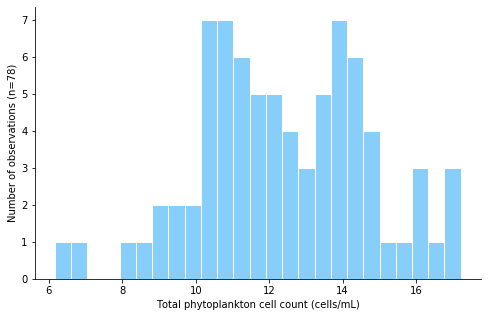

In [146]:
# Plot logged histogram of distribution
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(np.log(cct.iloc[:,1]), bins=25, color='lightskyblue', linewidth=1, edgecolor="white")
ax.set(xlabel='Total phytoplankton cell count (cells/mL)', ylabel=f'Number of observations (n={len(cct)})');

# Biovolume (total)

In [147]:
# Select date and depth columns
bt = df1.iloc[:,[0,2]]

In [148]:
# Drop null values
bt = bt.dropna(axis=0)

In [149]:
bt.head()

,date,biovolume
659,2018-05-03,5.572982e+06
672,2018-05-16,1.395221e+07
679,2018-05-23,6.561005e+06
687,2018-05-31,4.346729e+07
693,2018-06-06,3.299544e+09


In [150]:
# Check number of rows
bt.shape

(49, 2)

In [151]:
#plt.hist(depth.iloc[:,1], bins=30);

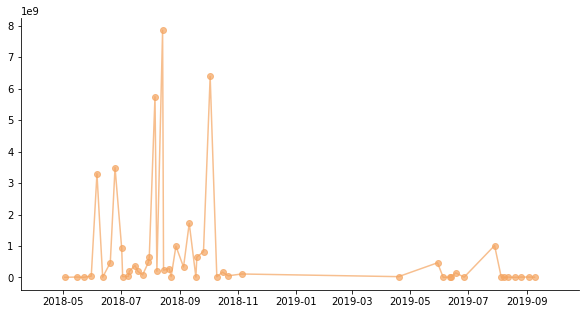

In [152]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(bt.iloc[:,0], bt.iloc[:,1], color='sandybrown', alpha=0.7)
ax.plot(bt.iloc[:,0], bt.iloc[:,1], color='sandybrown', alpha=0.7);

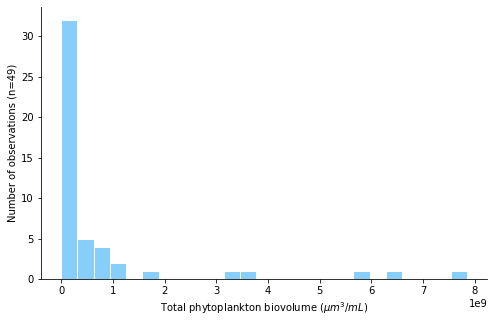

In [153]:
# Plot histogram of distribution
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(bt.iloc[:,1], bins=25, color='lightskyblue', linewidth=1, edgecolor="white")
ax.set(xlabel='Total phytoplankton biovolume ($ \mu m^3 / mL$)', ylabel=f'Number of observations (n={len(bt)})');

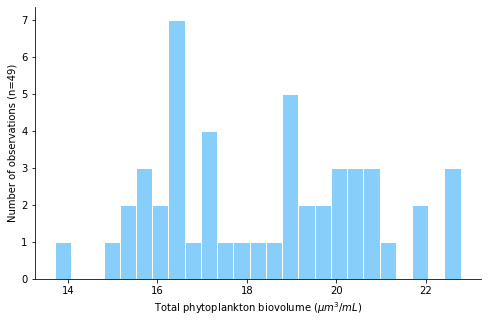

In [154]:
# Plot histogram of distribution
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(np.log(bt.iloc[:,1]), bins=25, color='lightskyblue', linewidth=1, edgecolor="white")
ax.set(xlabel='Total phytoplankton biovolume ($ \mu m^3 / mL$)', ylabel=f'Number of observations (n={len(bt)})');

# Cell count (cyanobacteria)

In [155]:
# Select date and depth columns
ccc = df2.iloc[:,[0,1]]

In [156]:
# Drop null values
ccc = ccc.dropna(axis=0)

In [157]:
ccc.head()

,date,cell_count
0,2016-07-13,2.373906e+07
1,2016-07-14,2.698017e+05
2,2016-07-15,4.604392e+06
7,2016-07-20,1.589423e+06
13,2016-07-26,3.386069e+04


In [158]:
# Check number of rows
ccc.shape

(98, 2)

In [143]:
#plt.hist(depth.iloc[:,1], bins=30);

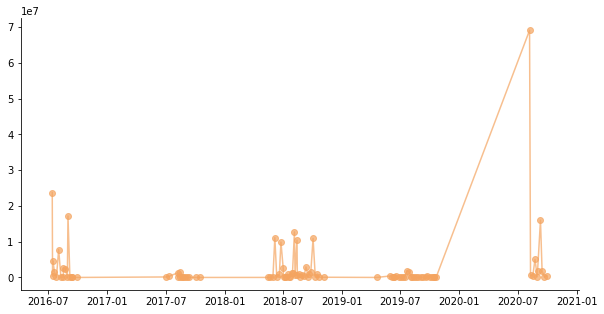

In [160]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(ccc.iloc[:,0], ccc.iloc[:,1], color='sandybrown', alpha=0.7)
ax.plot(ccc.iloc[:,0], ccc.iloc[:,1], color='sandybrown', alpha=0.7);

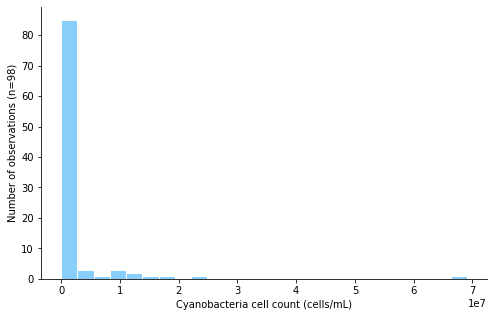

In [174]:
# Plot histogram of distribution
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(ccc.iloc[:,1], bins=25, color='lightskyblue', linewidth=1, edgecolor="white")
ax.set(xlabel='Cyanobacteria cell count (cells/mL)', ylabel=f'Number of observations (n={len(ccc)})');

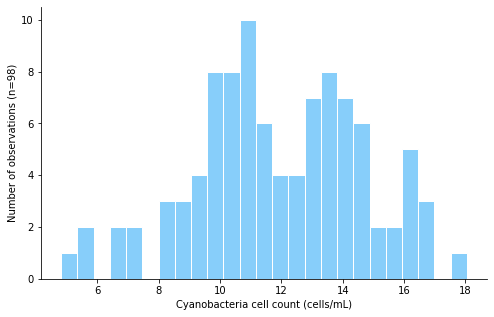

In [173]:
# Plot logged histogram of distribution
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(np.log(ccc.iloc[:,1]), bins=25, color='lightskyblue', linewidth=1, edgecolor="white")
ax.set(xlabel='Cyanobacteria cell count (cells/mL)', ylabel=f'Number of observations (n={len(ccc)})');

# Biovolume (total)

In [163]:
# Select date and depth columns
bc = df2.iloc[:,[0,2]]

In [164]:
# Drop null values
bc = bc.dropna(axis=0)

In [165]:
bc.head()

,date,biovolume
672,2018-05-16,2.344648e+05
679,2018-05-23,4.411497e+03
687,2018-05-31,5.812660e+05
693,2018-06-06,3.145746e+09
699,2018-06-12,2.787249e+06


In [166]:
# Check number of rows
bc.shape

(69, 2)

In [167]:
#plt.hist(depth.iloc[:,1], bins=30);

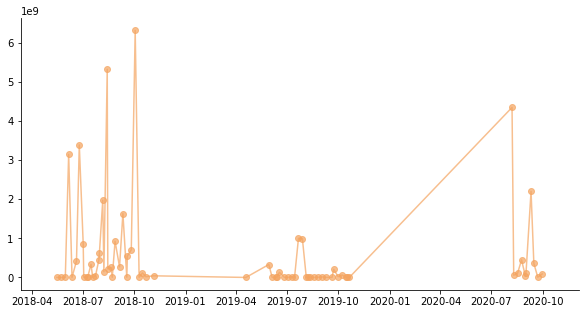

In [168]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(bc.iloc[:,0], bc.iloc[:,1], color='sandybrown', alpha=0.7)
ax.plot(bc.iloc[:,0], bc.iloc[:,1], color='sandybrown', alpha=0.7);

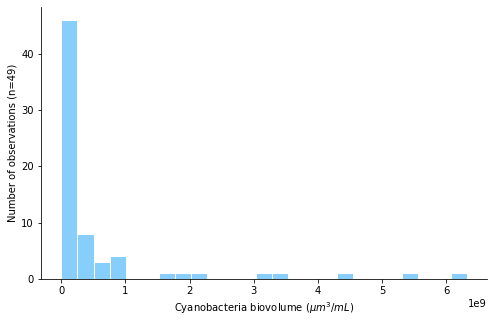

In [171]:
# Plot histogram of distribution
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(bc.iloc[:,1], bins=25, color='lightskyblue', linewidth=1, edgecolor="white")
ax.set(xlabel='Cyanobacteria biovolume ($ \mu m^3 / mL$)', ylabel=f'Number of observations (n={len(bt)})');

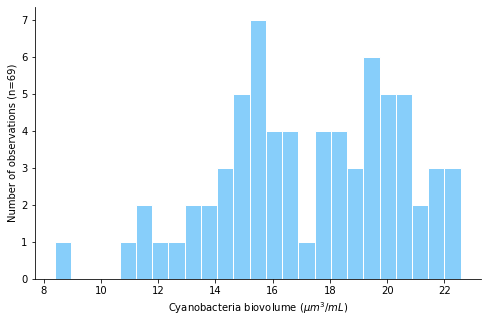

In [172]:
# Plot histogram of distribution
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(np.log(bc.iloc[:,1]), bins=25, color='lightskyblue', linewidth=1, edgecolor="white")
ax.set(xlabel='Cyanobacteria biovolume ($ \mu m^3 / mL$)', ylabel=f'Number of observations (n={len(bc)})');